# FOLLOWING IS THE CODE FOR VISUALIZING THE DATA CONTAINING THE FORIEGN EXCHANGE RATES PER DOLLAR FROM 2000-2019

In [1]:
#Importing the required files for plotting the graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
#Reading the dataset and replacing the no-data entries with NaN.
ds = pd.read_csv('dataset.csv')
ds = ds.replace('ND', np.nan)

In [3]:
#Now, filling the NaN rows with the previous valid entry to avoid ambiguity while plotting.
ds = ds.fillna(method ='pad')
ds=ds.drop('Unnamed: 0',axis=1)

In [6]:
#Since the data was in string data type, we hereby change them to integers.
ds[columns[1:]] = ds[columns[1:]].apply(pd.to_numeric)

In [5]:
#Looking at the column names.
columns = list(ds)
columns

['Time Serie',
 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
 'EURO AREA - EURO/US$',
 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
 'BRAZIL - REAL/US$',
 'CANADA - CANADIAN DOLLAR/US$',
 'CHINA - YUAN/US$',
 'HONG KONG - HONG KONG DOLLAR/US$',
 'INDIA - INDIAN RUPEE/US$',
 'KOREA - WON/US$',
 'MEXICO - MEXICAN PESO/US$',
 'SOUTH AFRICA - RAND/US$',
 'SINGAPORE - SINGAPORE DOLLAR/US$',
 'DENMARK - DANISH KRONE/US$',
 'JAPAN - YEN/US$',
 'MALAYSIA - RINGGIT/US$',
 'NORWAY - NORWEGIAN KRONE/US$',
 'SWEDEN - KRONA/US$',
 'SRI LANKA - SRI LANKAN RUPEE/US$',
 'SWITZERLAND - FRANC/US$',
 'TAIWAN - NEW TAIWAN DOLLAR/US$',
 'THAILAND - BAHT/US$']

In [7]:
# Changing the Time serie column to date time format for proper time series analysis.
ds['Time Serie']=pd.to_datetime(ds['Time Serie'])

### We here save the required images of individual currency plots

C:\Users\daddy\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


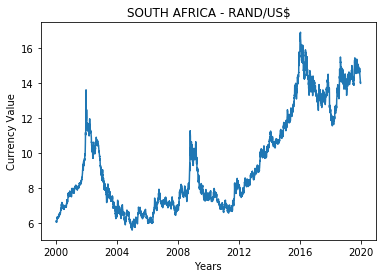

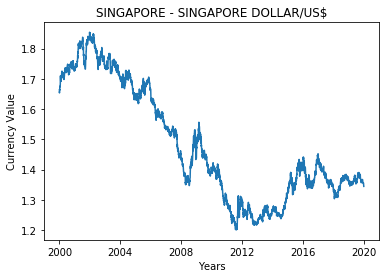

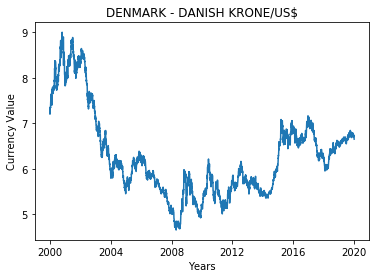

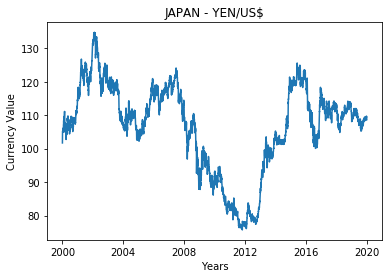

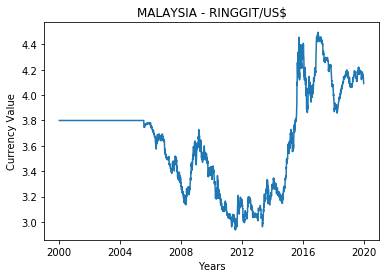

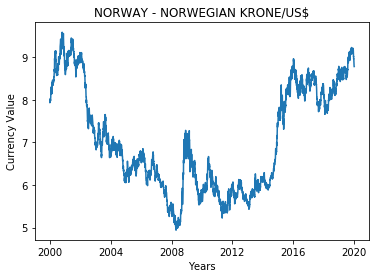

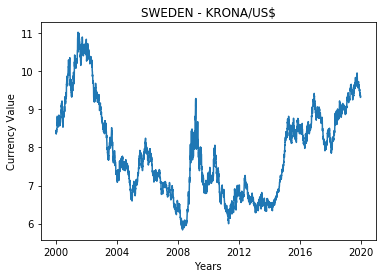

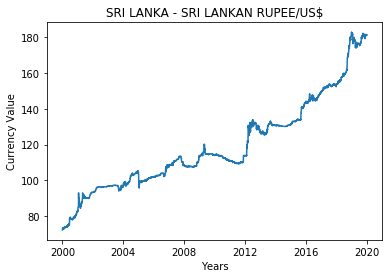

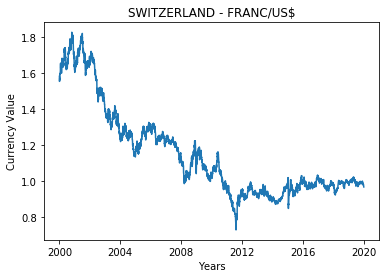

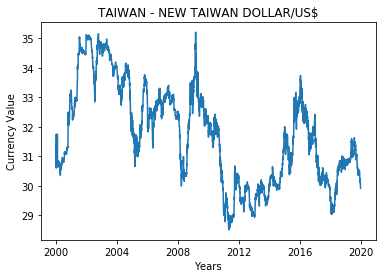

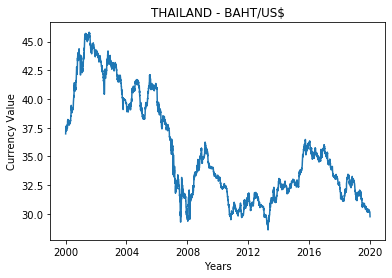

In [8]:
for i in range(12,23):
    x=ds[columns[0]]
    y=ds[columns[i]]
    plt.plot(x,y)
    plt.xlabel("Years")
    plt.ylabel("Currency Value")
    plt.title(columns[i])
    fname=columns[i].split(' ')[0]+'.jpg'
    plt.savefig(fname,dpi=500)
    plt.show()

### We now read the shape file of the world map for plotting the exchange rates of several countries given in the dataset.

In [9]:
fp = "99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp"
map_df = gpd.read_file(fp)
map_df.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


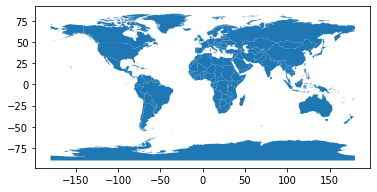

In [10]:
map_df = map_df[['CNTRY_NAME', 'geometry']]
map_df.plot()

### We use the median of the exchange rates of all the given currencies over the 20-yr period.

In [11]:
df = ds[columns[1:]].apply(pd.to_numeric)
df = df.median(axis = 0)

In [12]:
Country = ["Australia", "New Zealand", "United Kingdom", "Brazil", "Canada", "China", "India", "Mexico", "South Africa",
           "Singapore", "Denmark", "Malaysia", "Norway", "Sweden", "Switzerland"]

Count = [131.15, 144.26, 63.66, 233.10, 123.72, 685.97, 481.1, 1247, 817.91, 140.84, 607.40, 380, 678.60, 775.10, 103]

In [13]:
#Creating the dataframe which is to be used for map plotting
dsa = {'COUNTRY':Country, 'COUNT':Count}
DSA = pd.DataFrame(dsa)

In [14]:
DSA

,COUNTRY,COUNT
0,Australia,131.15
1,New Zealand,144.26
2,United Kingdom,63.66
3,Brazil,233.10
4,Canada,123.72
5,China,685.97
6,India,481.10
7,Mexico,1247.00
8,South Africa,817.91
9,Singapore,140.84


In [15]:
# Join both the DataFrames by country names

merged = map_df.set_index('CNTRY_NAME').join(DSA.set_index('COUNTRY'))
merged.head()

,geometry,COUNT
CNTRY_NAME,,
Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN
Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",NaN
Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",NaN
Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",NaN
Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",NaN


### We now plot the required heat map displaying the variations of exchange rates in the countries given in the dataset.

C:\Users\daddy\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


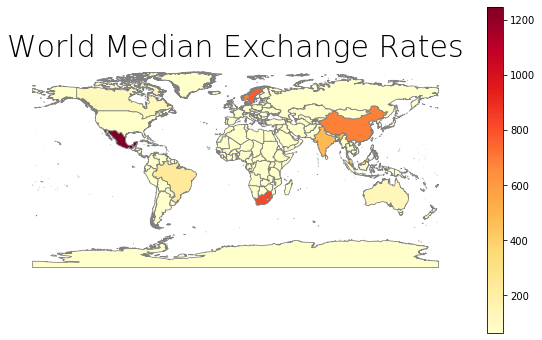

In [16]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('World Median Exchange Rates', fontdict={'fontsize': '30', 'fontweight' : '5'})

# plot the figure
merged.plot(column='COUNT', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

### Now, to visualise if any major effect took place on the exchange rate of any particular currency over the 20 year period

In [17]:
i = 1
a = []
b = []
c = []
k = 0
for j in ds[columns[i]]:
    a.append(ds.iloc[k, 0])
    k = k+1
    b.append(columns[i])
    c.append(j)

### We stack the data by currency in the form of dataframe.

In [18]:
tt = {'TIME':a,'Type':b,'Value':c}
tttt = pd.DataFrame(tt)
tttt

,TIME,Type,Value
0,2000-01-03,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5172
1,2000-01-04,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5239
2,2000-01-05,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5267
3,2000-01-06,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5291
4,2000-01-07,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5272
...,...,...,...
5212,2019-12-25,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.4445
5213,2019-12-26,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.4411
5214,2019-12-27,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.4331
5215,2019-12-30,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.4278


### Instead of writing the complete code, we use a built-in function which automatically stacks the column names alongside the time series data, which is the required format for plotting.

In [19]:
ds_alternate=ds.melt(id_vars=["Time Serie"],var_name="Type",value_name="Value")

In [20]:
ds_alternate

,Time Serie,Type,Value
0,2000-01-03,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5172
1,2000-01-04,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5239
2,2000-01-05,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5267
3,2000-01-06,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5291
4,2000-01-07,AUSTRALIA - AUSTRALIAN DOLLAR/US$,1.5272
...,...,...,...
114769,2019-12-25,THAILAND - BAHT/US$,30.1500
114770,2019-12-26,THAILAND - BAHT/US$,30.1500
114771,2019-12-27,THAILAND - BAHT/US$,30.1400
114772,2019-12-30,THAILAND - BAHT/US$,29.9400


### Since the exchange rate of Korean currency was too high as compared to the other exchange rates, we henceforth remove it from the initial plot and plot it seperately

In [21]:
ds_alternate_with_korea = ds_alternate.loc[ds_alternate['Type'] == "KOREA - WON/US$"]
ds_alternate_without_korea = ds_alternate.loc[ds_alternate['Type'] != "KOREA - WON/US$"]

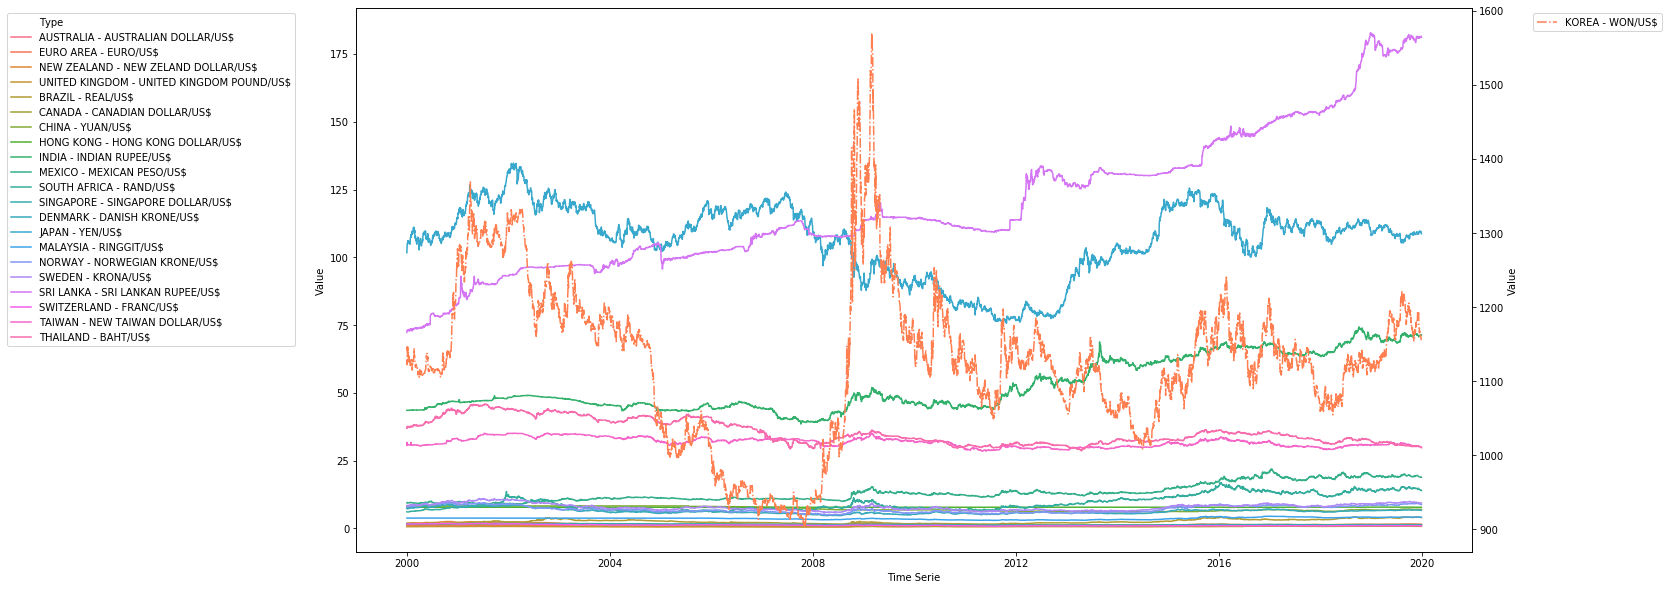

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

graph1=sns.lineplot(x="Time Serie", y="Value", hue="Type",ax=ax1,data=ds_alternate_without_korea)
graph1.legend(bbox_to_anchor=(-0.05, 1), loc=0)

graph2=sns.lineplot(x="Time Serie", y="Value", color="coral",label="KOREA - WON/US$",ax=ax2,data=ds_alternate_with_korea)
graph2.lines[0].set_linestyle("-.")
graph2.legend(bbox_to_anchor=(1.05, 1), loc=2)

## With this, we hereby end our code for the data visualisation of the foriegn exchange dataset. The graphs along with their proper explanation can be seen on our webpage (dashboard) as well as our ppt.